![Image of Yaktocat](https://pbs.twimg.com/profile_images/811501827363520512/zhuGojAu_400x400.jpg)

# Numpy

Numpy is a libray for working with N-dimensional arrays, italso provides many useful math functions. It's written in highly optimized C code so is very fast.

In [45]:
import numpy as np

In [169]:
n = 10 ** 5
a = list(range(n))
b = np.arange(n)

In [170]:
%%timeit
sum(a)

1.51 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [171]:
%%timeit
np.sum(b)

75.2 µs ± 5.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Thoughout the notebook we'll cover how to use numpy aswell as touch on some other libaries.

# Statistics 

In this section, we're going to learn how to perform basic statistical operations with Python. We're going to be using a couple of different libraries,namely numpy, scipy , seaborn and random from the standard library.


In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats
import scipy
import pandas as pd

#setting the seed ensure we get the same 'random' numbers
random.seed(1)
np.random.seed(1)

In [45]:
#Make plot show in notebooks and set fig size
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})


## Notation

The sumnation notation $ \Sigma $ is commonly used in stats.

$$  {\displaystyle \sum _{i=3}^{6}i^{2}=3^{2}+4^{2}+5^{2}+6^{2}=86} $$

Expressed in python code this would look like.


In [ ]:
sum([ i**2 for i in range(3,7) ])


Or without the list comprhension.


In [ ]:

total = 0
for i in range(3,7):
    total += i**2

Why is it `range(3,7)` and not `range(3,6)` ?



## Percentiles 

We talk about percentiles often in everyday life for example you may hear that someone is within the top 10% of income, or top 10% of test scores. If your test score is within the top 10%, this means that you score is in the 90th percentile.


In [33]:
l = np.random.random(100)
np.percentile(l,90)

0.87255262207783035

## Measures of central tendency

Mean, median and mode are all measures of central tendency, which can be used to describe probality distributions which we'll cover later. There defintions are given bellow.

* Mean is the the average value of a set of numbers. 
* Mode is the most common number within a list of numbers.
* Median is the middle number in a list of ordered numbers. If there there are two middle numbers like when the list is even  in length, then you take the average of the two.

Below is how you can calculate these using numpy.


In [52]:
x = np.random.randint(1,10,100)  # start,stop,amount 

In [53]:
np.mean(x)

4.9199999999999999

In [54]:
np.median(x)

5.0

In [55]:
stats.mode(x)

ModeResult(mode=array([4]), count=array([17]))

## Variance and Standard Deviation

Variance and standard deviation (SD) measure the spread of a data's distribution. **Think of better example ** If asked a group of 20 olympic sprinters to run a race and measure there times. We then ask a group of normal men and olympic sprinters to run a race. In race 1 the standard deviation would be much smaller compare to race 2. This is because the vast majority of the oylmpic spinters would finish with a second of each other. However in race 2 it would take the average man a much longer than the olympic spinters. There would be a greater deviation in the times taken to finish. 

Bellow is the formular for population standard deviation. 

$$ \sigma ={\sqrt {{\frac {1}{N}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}},{\rm {\ \ where\ \ }}\mu ={\frac {1}{N}}\sum _{i=1}^{N}x_{i} $$

*   $ \sigma $ stands for standard deviation
* $ \mu $ stands for average
* $ N $ is the sample size.

We also have a slightly different formular for sample standard deviation. 


$$ \sigma ={\sqrt {{\frac {1}{N -1}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}}$$

Say we wanted to study wages, ideally we'd be able to get the wages for everyone in a population. However in reality it would be very hard to get this infomation off of everyone, we'd likely only be able to get a sample, so we'd use the second formular.


## Questions

In this section are a bunch of practices questions to address the concepts just covered.

### 1. 
Calculate the following.

$$ {\displaystyle \sum _{n=1}^{1000 }{\frac {1}{n}}=1+{\frac {1}{2}}+{\frac {1}{3}} \cdots {\frac {1}{n}} }$$

In [ ]:
#Question 1

### 2.
Given a random dataset of test scores calculate who falls into the 90th percentile.

In [209]:
#run cell to install names package
!pip install names

In [210]:
#Question 2
import names 
test_scores  = [ (names.get_full_name(),random.randint(30,100)) for i in range(50)]

### 3.

Without numpy calculate mean, mode and median of list $ x $. How do you implmentations compare in speed to numpys? **Hint** you can use the python magic `%%timeit` to test how long a cell takes to run.

In [ ]:
#Question 3.

In [211]:
%%timeit
random.randint(1,100)

1.47 µs ± 57.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 4.
Bellow is a dataset for cacao production. 

In [156]:
df = pd.read_csv('data/flavors_of_cacao.csv')
df.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


We can calculate the standard deviation in rating by company like so

In [157]:
choc_std = df.groupby(["Company"]).std()
choc_std.head()

,REF,Review_Date,Rating
Company,,,
A. Morin,313.347028,1.033051,0.418802
AMMA,220.476303,1.341641,0.500000
Acalli,5.656854,0.000000,0.000000
Adi,0.000000,0.000000,0.353553
Aequare (Gianduja),0.000000,0.000000,0.176777


What could a high standard deviation suggest about those companies quality control process? 

## Distribtuions

Distributions describe the chance (or probability) of a value falling within a certain range. They can be split into density functions for continous data and mass functions for discrete data.


### Uniform Distribution

Probaly the simplest is the uniform distribution, which evenly distributes the data over a given range. 


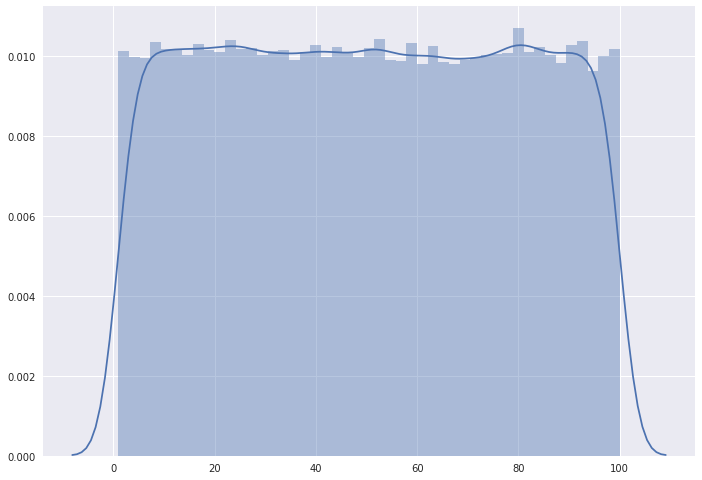

In [212]:
sns.distplot(np.random.uniform(1,100,100000))

Looking at the above graph the chance that we could pick 20 is equally likely that we could pick 40.

### Normal Distribution

The normal distribution or Gaussian distribution, is very common continous probablity distribution. It forms the classic bell curve, and often shows up in nature. For example heights and weights are normally distributed.

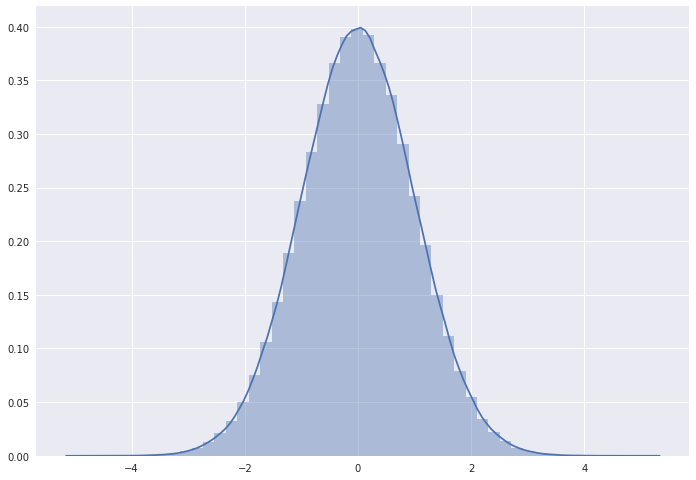

In [122]:
sns.distplot(np.random.randn(1000000))

### Moments
 
Moments are use to describe the shape of a distribution. In fact mean and standard deviation are both momements. Here well introduce another two skew and kurtosis. Skewness is a measure of symmery, or lack of it. A distribution is symmetric if both side of it look the same for example the normal distrbution Kurtosis is a measure of whether the data has long or short tails realative. Skewness and kurtosis are important measures because if there values are too big ([roughly](What_is_the_acceptable_range_of_skewness_and_kurtosis_for_normal_distribution_of_data) $ \pm 2 $) then some tradtional stastical test, like a [T-test](http://thestatsgeek.com/2013/09/28/the-t-test-and-robustness-to-non-normality/), no longer work because they assume the data is normally disributed. For a video summary see [here](https://www.youtube.com/watch?v=HnMGKsupF8Q)

<iframe width="560" height="315" src="https://youtu.be/HnMGKsupF8Q" frameborder="0" allowfullscreen></iframe>'


![](https://www.youtube.com/watch?v=HnMGKsupF8Q)

The plot bellow shows how mean median and mode relate to a skewed distribution.

![mean,median and mode](http://wiki.ubc.ca/images/5/56/Distribution02.png)

In [213]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [134]:
x = np.random.randn(100000)

Because the normal distribution is symetical the kurtosis and skew should be 0, or in this case very close to it.

In [156]:
print("Kurtosis for normal distribution: {}".format(kurtosis(x)))

Kurtosis for normal distribution: -0.01244555448294049


In [157]:
print("Skew for normal distribution: {}".format(skew(x)))

Skew for normal distribution: -0.009109369779048596


However this is not always true of other distributions

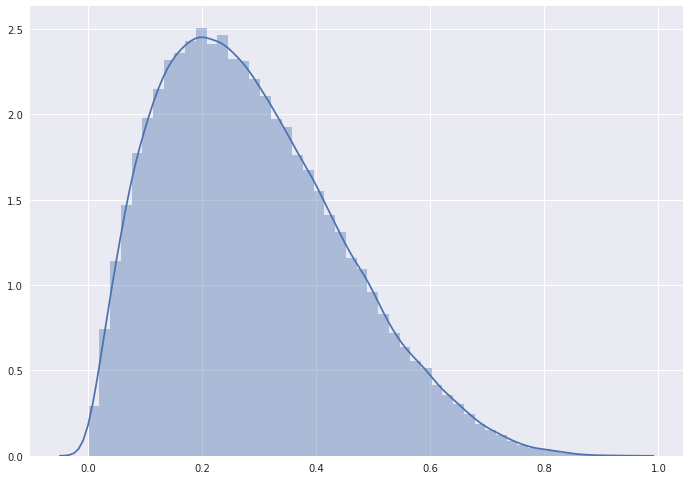

In [193]:
skewed_beta = np.random.beta(2,5,100000)
sns.distplot(skewed_beta)

In [170]:
mean = np.mean(skewed_beta)
median = np.median(skewed_beta)
print(mean,median)

0.285683038802 0.264763096039


In [58]:
# x = np.arange(0.0001, 10, 0.0001)
# plt.plot(x, stats.expon.pdf(x))

### Binomial Probability Mass Function


The binomial disribution can help calculate the probablity of a particular outcome over a certain number of independent trails.
Independent means the outcome of the previous trail has no effect on the next e.g coin tosses. Image we had 100 coin tosses of a even coin, using the bionomial distribution we could calculate the chance of getting 99 heads (highly unlikely), or 50 heads (much more likely). We can generate the bionomial dsitribution using it's proability mass function. It's a mass function because the data is discrete, since you can't have 1.5 heads when flipping coins.

The binomial distribution takes two parameters, the number of trails, the probablity of success.

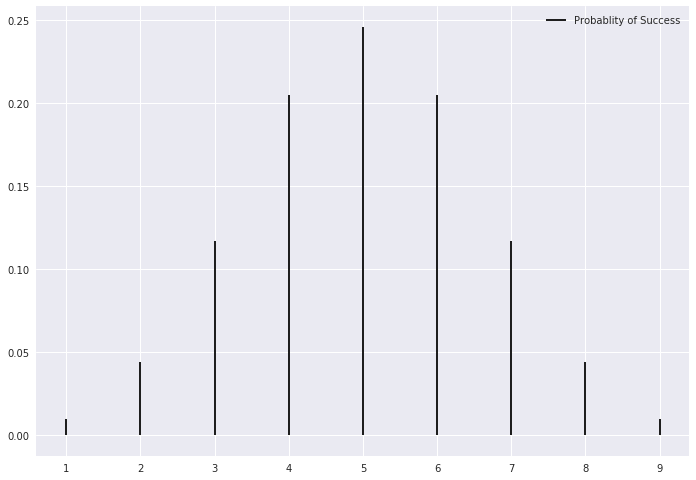

In [90]:
fig, ax = plt.subplots(1,1)
x = range(1,10) 
n, p = 10, 0.5 #n trails , prob of success
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), label='Probablity of Success')          
ax.legend(loc='best')          

By using the probablity mass function we can get probablity of 5 trails

In [86]:
rv.pmf(5)

0.24609375000000025

##  Questions

### 1. 

Write code to simulate 10,000 coin flips and return the percentage of heads.

In [183]:
sum(np.random.randint(0,2,10000))/10000

0.49270000000000003

### 2.

We have a bias coin that has a 70% chance of landing on heads. If we flip it 50 times, whats the chance of getting excatly 30 heads.

In [184]:
n, p = 50, 0.7
rv = binom(n, p)
rv.pmf(30)

0.037038763133295322

### 3. 

* Create a normal distribution with values ranging from with 10000 elements. 
* Using `sns.distplot` plot your distribution. 
* Calculate the mean, median, mode, skew and kurtosis for this distribution. * Hint * stats.describe  will be usefull.

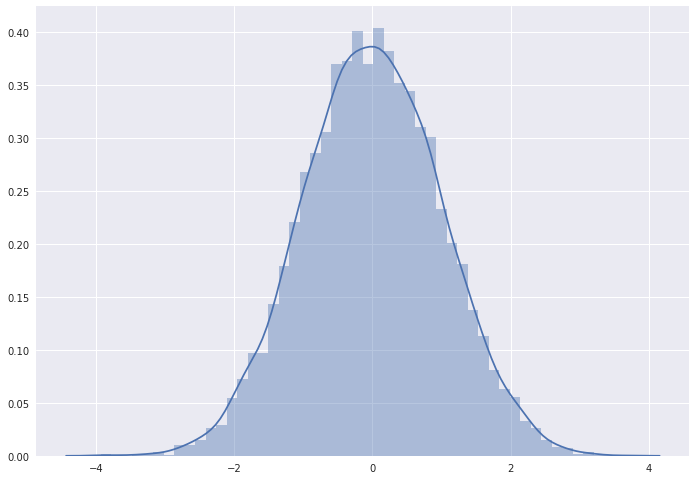

In [198]:
x = np.random.randn(10000)
sns.distplot(x)

In [199]:
stats.describe(x)

DescribeResult(nobs=10000, minmax=(-3.9312325760949069, 3.658290272596731), mean=-0.00064006260452402302, variance=0.9863096482097774, skewness=-0.004683137257760963, kurtosis=-0.07990329061237933)

### 4.

Create another distribution of your choice (not normal) and calculate all the moments we have covered and plot it. * Hint * type `np.random.` then hit tab to show all of potential random functions.

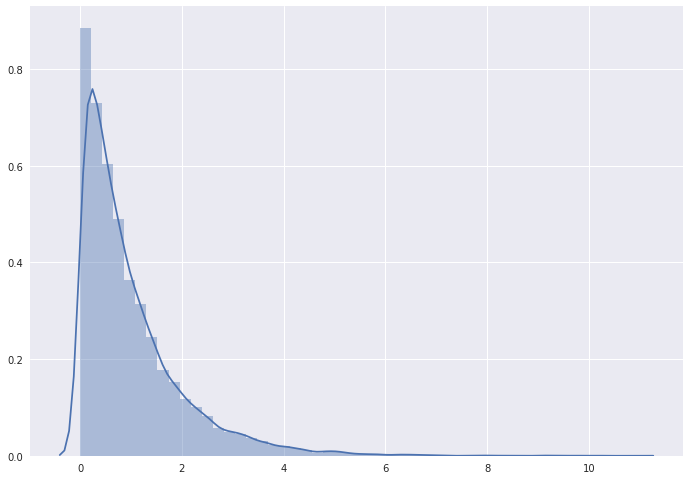

In [202]:
x = np.random.gamma(1,size=10000)
sns.distplot(x)

In [203]:
stats.describe(x)

DescribeResult(nobs=10000, minmax=(0.00014965032380129763, 10.862297403427402), mean=0.9974866395963814, variance=1.0349639609573826, skewness=2.1757032552755375, kurtosis=7.4937257540183975)


# Linear algerbra

Along with probality and statsics, multivariable calculus, linear algerbra is one of the key area of maths involved in deep learning. We represent neural networks using matrices, and linear algerbra is key for understanding how to work with these matrices. Linear algerbra is also very important in computer graphics and GPU where origionally designed to do it very fast. In more recent years there abilitly to to matrices maths very fast has been repurposed for deep learning. For further understanding on GPU’s, their relevance to Deep Learning see [here](https://www.analyticsvidhya.com/blog/2017/05/gpus-necessary-for-deep-learning/)

# Vectors 

Vectors are basically a list of numbers.

$$ v = \begin{bmatrix}
v_1\\ 
v_2\\ 
\end{bmatrix} $$

In the vector $ v $ we'd say $ v_1 $ is the first component, $ v_2 $ is the second component. When we add vectors we add each individual component.

$$ v = \begin{bmatrix}
v_1\\ 
v_2\\ 
\end{bmatrix} \qquad
w = \begin{bmatrix}
w_1\\ 
w_2\\ 
\end{bmatrix}  \qquad
v + w = \begin{bmatrix}
v_1 + w_1\\ 
v_2 + w_2\\ 
\end{bmatrix} $$



We could do this with python like.

In [2]:
v = [1,2,3,4]
w = [5,6,7,8]
x = []

for a,b in zip(v,w):
    x.append(a+b)
    
# x =  [a + b for a,b in zip(v,w)]
x

[6, 8, 10, 12]

Notice we have to use a for loop to add each element. This can get triesome, thankfully numpy helps us out here, as it automatically does the component-wise addition for us.

In [53]:
v = np.array([1,2,3,4])
w = np.array([5,6,7,8])
v + w

array([ 6,  8, 10, 12])

Another common operation is scalar multiplication in which we multiple each element in a vector by a scalar (number)

$$ 2v = \begin{bmatrix}
2v_1\\ 
2v_2\\ 
\end{bmatrix} $$

In [54]:
2 * v

array([2, 4, 6, 8])

Often instead of thinking of vectors a list of numbers we like to think of them as points in space. For example a vector with two components can be though of as a point in the xy plane.

## Geometric interpretation

An alternative view of vectors as a points in [space](https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib). The vector  $ \begin{bmatrix} 3\\ -2 \\ \end{bmatrix} $, means go right 3 steps and down -2 steps. We can show this in code by plotting it.

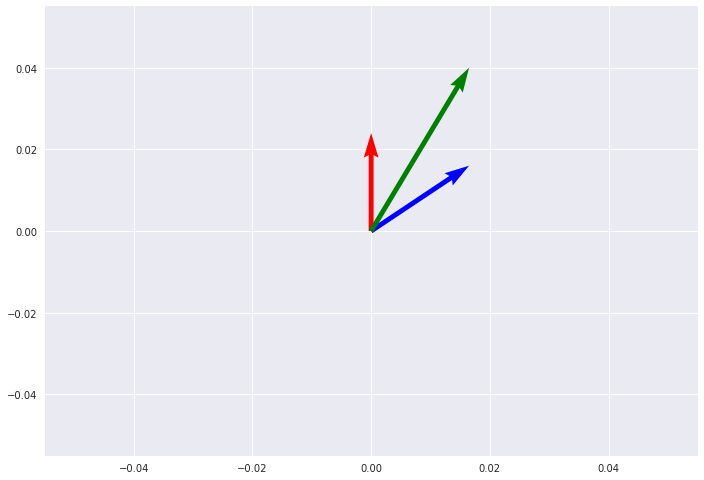

In [251]:
v = np.array([3,6])
w = np.array([1,3])
origin = [0], [0] # origin point
# plt.quiver(*origin, v,w, color=['r','b'],scale=20)

plt.quiver(0, 3, color='r',units="width",scale=20)
plt.quiver(3, 2 , color='b',units="width",scale=20)
plt.quiver(3, 5 , color='g',units="width",scale=20)

# Dot Product

Given two vectors we can get the dot product by multiplying each element together and then taking the sum of the final vector.

# $$ v \cdot w = v_1 w_1 + v_2 w_2 $$


We can represent this in python code like so

In [91]:
v = [1,2,3,4,5]
w = [6,7,8,9,10]

total = 0
for i,j in zip(v,w):
    total += i*j
    
print(total)

130


Numpy makes this alot simpler

In [92]:
np.dot(a,b)

130

# Questions

### 1. 

Create vector  $ a $ with values ranging from 1 to 10. Create another vector $ b $ with values ranging from 21 to 30. Take the dot product of $ a $ and $ b $.

In [93]:
a = np.arange(1,10)
b = np.arange(21,30)
a * b

array([ 21,  44,  69,  96, 125, 156, 189, 224, 261])

### 2.
Create a vector with values only even values ranging from 1 to 100 - in indexing section.


In [121]:
np.arange(2,101,2)

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

### 3.
 
How do you reverse a vector ?

In [122]:
np.arange(2,101,2)[::-1]

array([100,  98,  96,  94,  92,  90,  88,  86,  84,  82,  80,  78,  76,
        74,  72,  70,  68,  66,  64,  62,  60,  58,  56,  54,  52,  50,
        48,  46,  44,  42,  40,  38,  36,  34,  32,  30,  28,  26,  24,
        22,  20,  18,  16,  14,  12,  10,   8,   6,   4,   2])

### 4.

Find indices of all non-zero elements from  $ [1,23,0,2,4,0] $. * Hint * `np.nonzero`


In [118]:
x = np.array([1,23,0,2,4,0])
np.nonzero(x)

(array([0, 1, 3, 4]),)

### 5.

The three corners of a parallograme are $ (1,1) $, $ (4,2) $, and $ (1,3) $, this is plotted bellow. What are the 3 other possible corners? 

In [217]:
a = np.array([0,0])
b = np.array([3,1])
c = np.array([0,2])

In [225]:
d = b + c
e = c - b
f = b -c


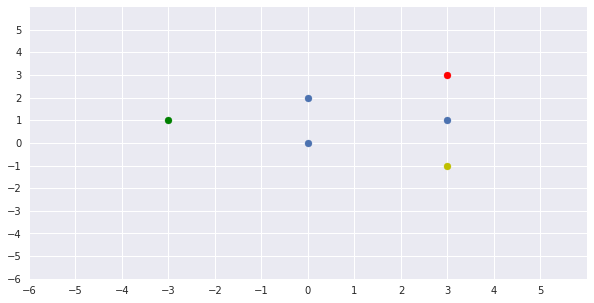

In [226]:
n = 6
plt.figure(figsize=(10,5))
plt.xlim(-n,n)
plt.ylim(-n,n)
plt.xticks(np.arange(-n,n,1));
plt.yticks(np.arange(-n,n,1));
plt.scatter(*zip(*[a,b,c]))
plt.scatter(*d,color='r')
plt.scatter(*e,color='g')
plt.scatter(*f,color='y')

# Matrix 

A matrix is a grid of numbers arranged into m rows and n columns, kind of like a excel spread sheet.

$$ A = 
\begin{bmatrix}
 1 & 2 \\ 
 3 & 4 \\ 
 5 & 6 
\end{bmatrix} $$


 $ A $ is a matrix with 3 row and 2 columns or a 3 by 2 matrix. The items inside a matrix are called elements, so each element in $ A $ is a number. In numpy there a numerous methods to create matrices, some are demostrated bellow


In [227]:
np.random.random((3,3))

array([[ 0.36592721,  0.70598879,  0.57818689],
       [ 0.24585161,  0.73850868,  0.33433893],
       [ 0.82485778,  0.92059805,  0.85819294]])

In [228]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [229]:
np.ones((2,10))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [230]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [231]:
np.array([[1402,191],[1371,821],[949,1437]])

array([[1402,  191],
       [1371,  821],
       [ 949, 1437]])

## Matrix indexing

We can access indvidual elements using the syntax

```
Matrix[row,col]
```

In [232]:
A = np.array([[1402,191],[1371,821],[949,1437]])
row = 0
col = 0
A[row,col]

1402

The normal python index rules apply so we can index matrix using 

```python
Matrix[start:stop:step,start:stop:step]
```

In [233]:
#A[0::2] #alternative syntax
A[0::2,:] # return only odd rows

array([[1402,  191],
       [ 949, 1437]])

In [232]:
A[1::2,:] # return only even rows

array([[1371,  821]])

In [233]:
A[0::2,0::2] # odd rows and odd cols

array([[1402],
       [ 949]])

## Matrix addition

When we you add two matrices the elemnts are added element wise. The same rules apply for subtraction

$$ \begin{bmatrix}
 1 & 2 \\ 
 3 & 4 \\ 
 5 & 6 
\end{bmatrix} +
 \begin{bmatrix}
 1 & 1 \\ 
 1 & 1 \\ 
 1 & 1 
\end{bmatrix} =
 \begin{bmatrix}
 1 +1 & 1 +2 \\ 
 1 + 3& 1 + 4 \\ 
 1 +5 & 1 + 6 
\end{bmatrix} $$

In traditional maths only matrices of the same size can be added or subtracted. However in numpy these rules are relax by something called broadcasting, which well cover later.

In [234]:
np.ones((5,5)) + np.ones((5,5)) 

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.]])

## Multiplication 

Matrix multiplication is slghtly more complicated than addition and subtraction. I'll start by explaining when it's valid to multiply two matrices together and later how you do it.

### Inside outside rule

Matrix multiplication has different rules to addtion and subtraction. Matrices must be of certain dimensions if we wish to multiply them together. Say we have matrix $ A $ which is **m by n** and we have matrix $ B $ which is **n by p**, the two matrices can only be multiplied if n ==  n. The resulting product will be **m by p**. This is explained by the picture bellow



![inny outey rule](https://www.freemathhelp.com/images/lessons/mat11.png)

We can express the above matrix multiplcation in numpy like so.

In [234]:
X = np.array([[1,2,3],[4,5,6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [235]:
y = np.array([9,8,7])
y

array([9, 8, 7])

In [236]:
X*y

array([[ 9, 16, 21],
       [36, 40, 42]])

### The calculation

But how is the anwser calculated? We can think of the calculation in terms of dot products.  We can figure out the resulting matrix shape using the inside out rule. So to fill position 1,1  in our new matrix we take the dot product from row 1 of the first matrix and column 1 from the second matrix

![matrix mul](https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg)

The next position we want to calcualte is (1,2), so we take the dot product of row 1 from the first matrix and column two from the second. 

![](https://www.mathsisfun.com/algebra/images/matrix-multiply-b.svg)

## Reshaing

As we have seen above if matrices are not of the corret shape we can't do operations upon them. Often in deep learning we need to reshape matrices in order to create our networks. 

In [237]:
A = np.arange(1,10)
A

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [238]:
A.reshape((3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

We can get the shape of a matrix like so.

In [154]:
C.shape

(4, 3)

In [155]:
B.shape

(2, 2)

## Order matters

The order of matrix multiplcation matters. That means that

$$ AB \neq BA $$ 



In [163]:
A = np.arange(1,10).reshape((3,3))
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [164]:
B = np.arange(10,19).reshape((3,3))
B

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [165]:
np.matmul(A,B)

array([[ 84,  90,  96],
       [201, 216, 231],
       [318, 342, 366]])

In [166]:
np.matmul(B,A)

array([[138, 171, 204],
       [174, 216, 258],
       [210, 261, 312]])

In [167]:
np.matmul(A,B) == np.matmul(B,A)

array([[False, False, False],
       [False,  True, False],
       [False, False, False]], dtype=bool)

# Transpose

The transpose switches the rows and columns in a matrix.A transpose can be thought of as rotating a matrix around it's diagonal. The diagonal starts in the top left hand corner and ends in the bottom right and corner. In maths the transpose is indicated by a T in the top-right corner of the matrix.

$$ \begin{bmatrix}
 1 & 2 & 3 \\ 
 4 & 5 & 6
\end{bmatrix}^T =
\begin{bmatrix}
1 & 2\\ 
3 & 4\\ 
5 & 6
\end{bmatrix} $$

In [151]:
A = np.array([[1,0],[1,1]])
A

array([[1, 0],
       [1, 1]])

In [153]:
A.T

array([[1, 1],
       [0, 1]])

# Broadcasting

In numpy the rules for addition, subtraction and multiplication are relaxed. Broadcasting allows us to take the hadmard product (element wise multiplication) of a matrix and a vector, even though there shapes are not the same.



$$ \begin{bmatrix}
a_1  \\ 
a_2   
\end{bmatrix} \cdot
\begin{bmatrix}
b_1 & b_2  \\ 
b_3 & b_4   
\end{bmatrix} =
\begin{bmatrix}
a_1 \cdot b_1 & a_1 \cdot b_2  \\ 
a_2 \cdot b_3 &  a_2 \cdot b_4   
\end{bmatrix} $$

In [117]:
A = np.array([1,2])
B = np.array([[2,3],
              [4,5]])
np.multiply(A,B)

array([[ 2,  6],
       [ 4, 10]])

The same rules apply for addition

In [244]:
A = np.array([0,1])
B = np.array([[1,2],
              [3,4]])
A + B

array([[1, 3],
       [3, 5]])

## Questions


### 1. 

Define a function that returns True of False depending if two matrices can be multiplied together.


In [ ]:
#Question 1

### 2.

Define a function that given two matrices will return the dimension of the multiplication.

In [ ]:
# Question 2

### 3.

Create a 3 by 3 matrix with values ranging from 1 to 9

### 4.

Create a 3 by 3 by 3 matrix with random values

### 5.

Reshape the following matrices $ A $ and $ B $ so that they can be multiplied together.

In [96]:
A = np.ones((3,4))
B = np.random.random((6,2))

### 6.

Using C and D (defined bellow) perform the following operation $ C \cdot D^T $

In [98]:
C = np.ones((5,5))
D = np.random.random((2,5))

### 7. 
Given the bellow 3 matrices put them in a order that they can multipled togeter

In [109]:
X1 = np.ones((4,3))
X2 = np.ones((5,4)) + 2
X3 = np.ones((3,5)) +1

In [114]:
X4 = np.matmul(X2,X1)
X4.shape

(5, 3)

In [115]:
np.matmul(X3,X4)

array([[ 120.,  120.,  120.],
       [ 120.,  120.,  120.],
       [ 120.,  120.,  120.]])

### 8.

How would you create a 8 by 8 matrix with a checkboard pattern?

In [126]:
A = np.zeros((8,8))
A

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### 9.

Can you multiply the two matrices, $ A $ and $ B $, without using numpy?

In [133]:
A=[[1,2]
  ,[3,4]]

B=[[3,4]
  ,[5,6]]

In [151]:
def multi(A,B):
    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(B)):
            total = 0
            for k in range(len(A[j])):
                total += A[i][k] * B[k][j]
            row.append(total)
        result.append(row)
    return result
                

In [152]:
multi(A,B)

[[13, 16], [29, 36]]

### 10. 

How would you take the transpose of a matrix without using numpy?

In [145]:
def transpose(matrix):
    new_matrix = []
    for row in range(len(matrix[0])):
        col_list = []
        for col in range(len(matrix)):
            col_list.append(matrix[col][row])
        new_matrix.append(col_list)

    return new_matrix

In [154]:
transpose(A)

[[1, 3], [2, 4]]

## Additional resources

Bellow are list of useful resources

* [SciPy numpy talk](https://www.youtube.com/watch?v=lKcwuPnSHIQ)
* [Matrix multiplication ](https://www.freemathhelp.com/matrix-multiplication.html)
* [Maths needed for deep learning?](https://www.quora.com/What-mathematical-background-does-one-need-for-learning-Deep-Learning)
* [Linear algebra for deep learning](http://www.deeplearningbook.org/contents/linear_algebra.html)
* [Great youtube playlist on linear algebra](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)
